In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("../data/subset_dataset_frunza_roxana.csv")

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
my_columns = [
    "BldgType", "HouseStyle", "OverallQual", "OverallCond",
    "YearBuilt", "YearRemodAdd", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "SalePrice"
]

df_subset = train_df[my_columns]

In [9]:
df_subset.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
591,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,481.0,235000
184,2fmCon,1Story,5,4,1965,1965,Hip,CompShg,Plywood,HdBoard,NaN,0.0,131500
743,TwnhsE,1Story,8,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,215000
178,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,118500
597,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,324000


In [12]:
df_subset.shape

(934, 13)

    How old the house is    

In [13]:
df_subset["HouseAge"] = 2025 - df_subset["YearBuilt"]

    How many years since it was last remodeled

In [14]:
df_subset["YearsSinceRemodel"] = 2025 - df_subset["YearRemodAdd"]

    1 if the house was remodeled, 0 if not.

In [15]:
df_subset["IsRemodeled"] = (df_subset["YearBuilt"] != df_subset["YearRemodAdd"]).astype(int)

    Groups houses by age range New/Moderate/Old/Very old

In [28]:
df_subset["AgeCategory"] = pd.cut(df_subset["HouseAge"], bins=[0, 20, 50, 100, 200], labels=["New", "Moderate", "Old", "Very Old"])

In [29]:
df_subset.head(10)

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice,HouseAge,YearsSinceRemodel,IsRemodeled,AgeCategory
591,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,481.0,235000,19,18,1,New
184,2fmCon,1Story,5,4,1965,1965,Hip,CompShg,Plywood,HdBoard,NaN,0.0,131500,60,60,0,Old
743,TwnhsE,1Story,8,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,215000,22,22,0,Moderate
178,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,118500,35,35,0,Moderate
597,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,324000,32,32,0,Moderate
716,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,158.0,193000,26,26,0,Moderate
899,1Fam,1Story,5,6,1956,1956,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,128900,69,69,0,Old
433,1Fam,1Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,155000,19,18,1,New
549,1Fam,2Story,6,6,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkFace,360.0,167900,61,61,0,Old
78,1Fam,1.5Fin,5,6,1946,1995,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,130500,79,30,1,Old


In [30]:
features = ["HouseAge", "YearsSinceRemodel", "IsRemodeled", "AgeCategory"]

numeric_features = df_subset[features].select_dtypes(include=["int64", "float64"]).columns

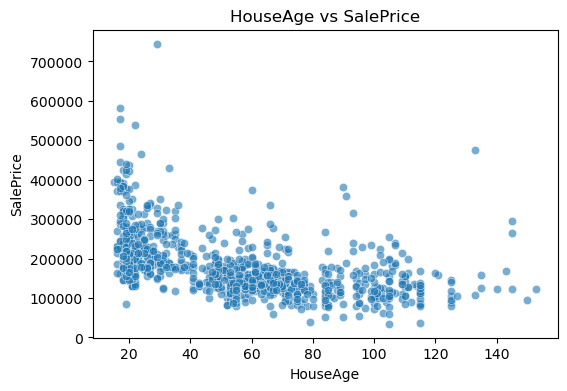

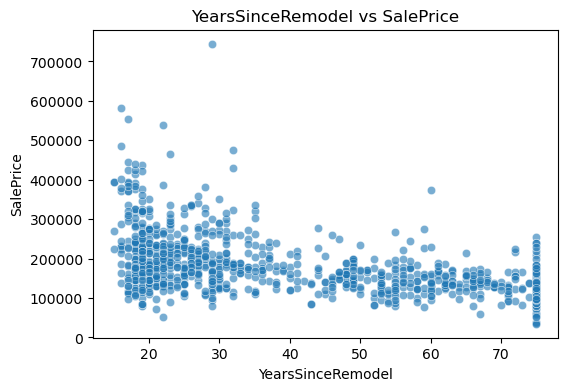

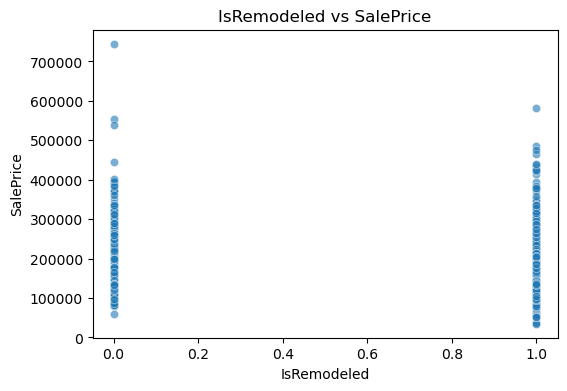

In [31]:
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_subset, x=feature, y="SalePrice", alpha=0.6)
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

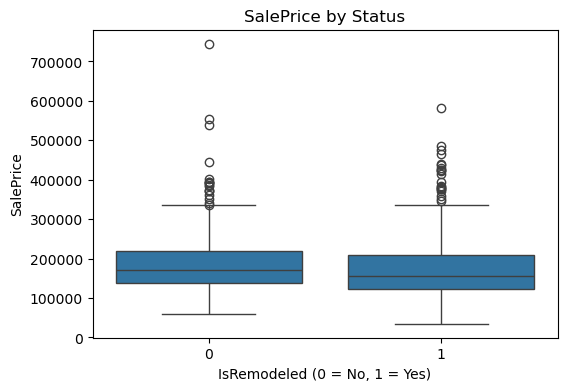

In [32]:
plt.figure(figsize=(6, 4))
if feature == "IsRemodeled":
    sns.boxplot(data=df_subset, x=feature, y="SalePrice")
    plt.title("SalePrice by Status")
    plt.xlabel("IsRemodeled (0 = No, 1 = Yes)")
    plt.ylabel("SalePrice")
    plt.show()

In [33]:
correlations = df_subset[list(numeric_features) + ["SalePrice"]].corr()["SalePrice"]
print(correlations)

HouseAge            -0.515217
YearsSinceRemodel   -0.492897
IsRemodeled         -0.065461
SalePrice            1.000000
Name: SalePrice, dtype: float64


    HouseAge and YearsSinceRemodel both have a moderate negative correlation with SalePrice. This means that older/+houses that were remodeled a long time ago tend to have lower prices

    IsRemodeled has a very weak negative correlation, meaning being remodeled or not doesn’t strongly affect the price on its own 

In [34]:
df_subset.describe()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice,HouseAge,YearsSinceRemodel,IsRemodeled
count,934.000000,934.000000,934.000000,934.000000,929.000000,934.000000,934.000000,934.000000,934.000000
mean,6.107066,5.602784,1970.422912,1984.734475,104.329386,181034.540685,54.577088,40.265525,0.482869
std,1.372402,1.130135,30.826972,20.788790,169.348616,76451.940718,30.826972,20.788790,0.499974
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,34900.000000,15.000000,15.000000,0.000000
25%,5.000000,5.000000,1953.000000,1966.000000,0.000000,130500.000000,25.000000,21.000000,0.000000
50%,6.000000,5.000000,1972.000000,1994.000000,0.000000,164800.000000,53.000000,31.000000,0.000000
75%,7.000000,6.000000,2000.000000,2004.000000,170.000000,213437.500000,72.000000,59.000000,1.000000
max,10.000000,9.000000,2010.000000,2010.000000,1047.000000,745000.000000,153.000000,75.000000,1.000000


In [35]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 591 to 1126
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BldgType           934 non-null    object  
 1   HouseStyle         934 non-null    object  
 2   OverallQual        934 non-null    int64   
 3   OverallCond        934 non-null    int64   
 4   YearBuilt          934 non-null    int64   
 5   YearRemodAdd       934 non-null    int64   
 6   RoofStyle          934 non-null    object  
 7   RoofMatl           934 non-null    object  
 8   Exterior1st        934 non-null    object  
 9   Exterior2nd        934 non-null    object  
 10  MasVnrType         392 non-null    object  
 11  MasVnrArea         929 non-null    float64 
 12  SalePrice          934 non-null    int64   
 13  HouseAge           934 non-null    int64   
 14  YearsSinceRemodel  934 non-null    int64   
 15  IsRemodeled        934 non-null    int64   
 16  AgeCategor

In [37]:
df_subset.to_csv("../data/frunza_roxana_new_features.csv", index=False)